In [95]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

import statsmodels.api as sm 
import sklearn as sk

from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumSquareRoundR.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

## 전체데이터로드
- 농어길이,무게 56개

In [47]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


#### scatter (perch length,weight)

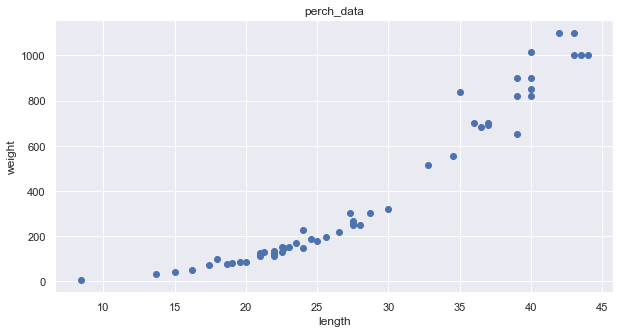

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length,y=perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch_data')

plt.show()

#### 훈련세트 테스트세트 분리

In [49]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [50]:
train_input # 훈련세트는 2차원배열이어야 하는데 지금은 1차원

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [56]:
temp = np.column_stack((train_input))
temp.shape

(1, 42)

In [51]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [68]:
new_train_input =np.row_stack((train_input))
new_train_input.shape

#reshape(-1,1)

(42, 1)

In [65]:
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

### 결정계수($R^2$)

In [67]:
from sklearn.neighbors import KNeighborsRegressor
#KNN 훈련

In [71]:
knr=KNeighborsRegressor()
knr.fit(X=new_train_input,y=train_target)

# 반드시 훈련세트는 이차원배열 !

KNeighborsRegressor()

In [74]:
knr.score(X=new_test_input,y=test_target)
# 테스트타겟도 이차원배열
# 결정계수 0.9928

0.992809406101064

### MAE
- Mean Absolute Error

In [76]:
from sklearn.metrics import mean_absolute_error

#테스트세트에 대하 예측을 만듦

In [77]:
test_pred = knr.predict(X=new_test_input)

In [82]:
test_pred
#예측된 무게

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [80]:
new_test_input
#실제 테스트할 농어 길이리스트

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [81]:
# 실제 측정된 농어 무게리스트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [85]:
# 테스트 타켓세트에 대한 평균 절댓값 오차(MAE) 계산
mae = mean_absolute_error(y_true=test_target,y_pred=test_pred)
mae

19.157142857142862

결과에서 예측이 평균적으로 19.15g 정도 타겟값과 다르게 예측되었음

### 과소적합 (underfitting)
- 훈련세트보다 테스트세트의 테스팅결과가 더 좋을 경우
- 훈련세트와 테스트세트의 결정계수가 모두 낮은 경우

In [86]:
#테스트 결정계수
knr.score(X=new_train_input,y=train_target)

0.9698823289099254

#### 과대적합(overfitting)
- 훈련세트로 나온 결정계수는 매우 좋으나 테스트세트에서 나온 결정계수가 매우 나쁠때


### 과소적합 문제 해결방법
- 모델을 조금 더 복잡하게 만들면 된다.-> n_neighbors 기본5개인데 줄인다.

In [87]:
# 최근접이웃갯수줄임
knr.n_neighbors = 3

#재훈련
knr.fit(X=new_train_input,y=train_target)
knr.score(X=new_test_input,y=test_target)

0.9746459963987609

In [89]:
knr.score(X=new_train_input, y=train_target)
# 과소적합문제해결

0.9804899950518966

확인문제

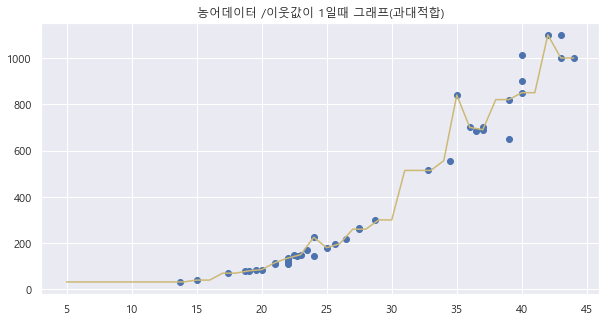

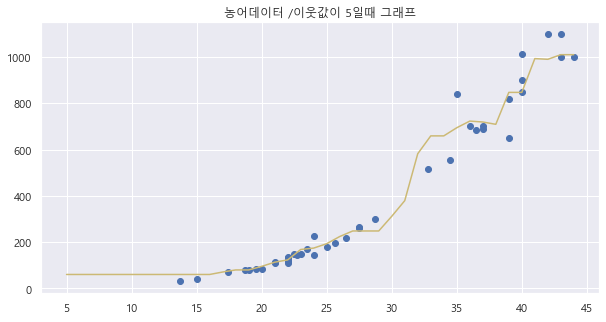

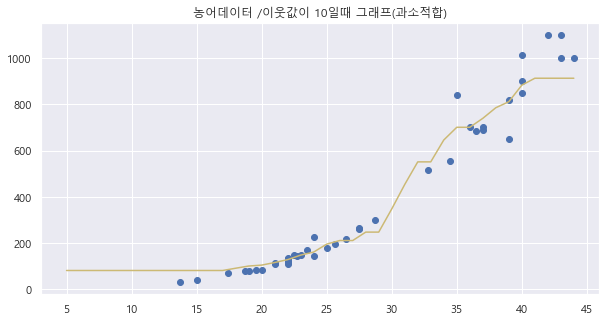

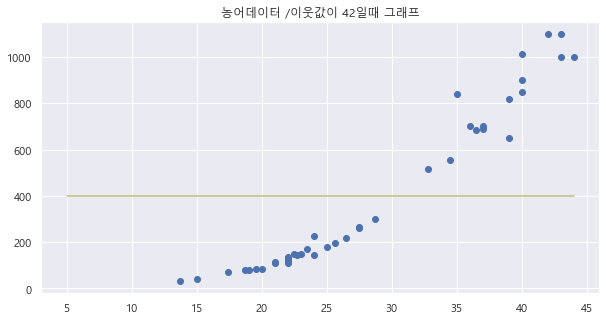

In [102]:
#KNN 회귀객체만듦
knr = KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1)
x

#k이웃값을 1,5,10으로 변경하며서 예측을하고 차트그리기
for n in [1,5,10,42]:
    knr.n_neighbors=n
    knr.fit(X=new_train_input,y=train_target)

    #x에 대한 예측을 도출
    pred=knr.predict(X=x)
    # 훈련세트와 예측결과를 산점도에 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(x=new_train_input,y=train_target)
    plt.plot(x,pred,color='y')
    title=f'농어데이터 /이웃값이 {n}일때 그래프'
    if n ==1:
        title += '(과대적합)'
    elif n ==10:
        title += '(과소적합)'
    plt.title(title)
    plt.show()